1:
MNIST: This is one of the important databases for deep learning. Microsoft and Google lab researchers have reportedly contributed to this dataset of handwritten digits. It is basically constructed from NIST that contains binary images of handwritten digits.

Build an image classifier using the MNIST dataset

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [3]:
X_train=X_train/255.0

In [4]:
X_test=X_test/255.0

In [5]:
from keras.utils import to_categorical
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [6]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(60000, 28, 28) (60000, 10)
(10000, 28, 28) (10000, 10)


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,MaxPooling2D,Flatten,Conv2D

In [8]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))


2023-03-14 12:08:49.574873: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                        

In [9]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
#the Convolutional Neural Network (CNN)expects a 4D tensor input with shape (num_samples, height, width, channels).
#Therefore, we reshape the input data,we use the -1 argument for the first dimension to infer the number of samples automatically.
#we set the last dimension to 1 to indicate that the images have only one channel (i.e., grayscale images).

history=model.fit(X_train.reshape(-1, 28, 28, 1), y_train, batch_size=128, epochs=10, validation_split=0.1)

Epoch 1/10
422/422 [==============================] - 11s 26ms/step - loss: 0.1154 - accuracy: 0.9674 - val_loss: 0.0547 - val_accuracy: 0.9845
Epoch 2/10
422/422 [==============================] - 11s 25ms/step - loss: 0.0970 - accuracy: 0.9717 - val_loss: 0.0503 - val_accuracy: 0.9852
Epoch 3/10
422/422 [==============================] - 12s 28ms/step - loss: 0.0844 - accuracy: 0.9755 - val_loss: 0.0480 - val_accuracy: 0.9882
Epoch 4/10
422/422 [==============================] - 13s 32ms/step - loss: 0.0738 - accuracy: 0.9783 - val_loss: 0.0473 - val_accuracy: 0.9882
Epoch 5/10
422/422 [==============================] - 13s 30ms/step - loss: 0.0655 - accuracy: 0.9805 - val_loss: 0.0454 - val_accuracy: 0.9885
Epoch 6/10
422/422 [==============================] - 12s 29ms/step - loss: 0.0587 - accuracy: 0.9819 - val_loss: 0.0452 - val_accuracy: 0.9887
Epoch 7/10
422/422 [==============================] - 14s 34ms/step - loss: 0.0535 - accuracy: 0.9840 - val_loss: 0.0459 - val_accuracy:

In [15]:
score=model.evaluate(X_test.reshape(-1,28,28,1), y_test, batch_size=10, verbose=1)

1000/1000 [==============================] - 2s 2ms/step - loss: 0.0398 - accuracy: 0.9889


In [16]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.03978675603866577
Test accuracy: 0.9889000058174133


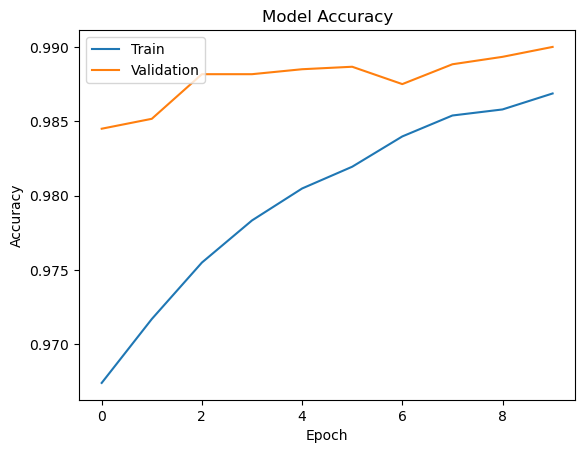

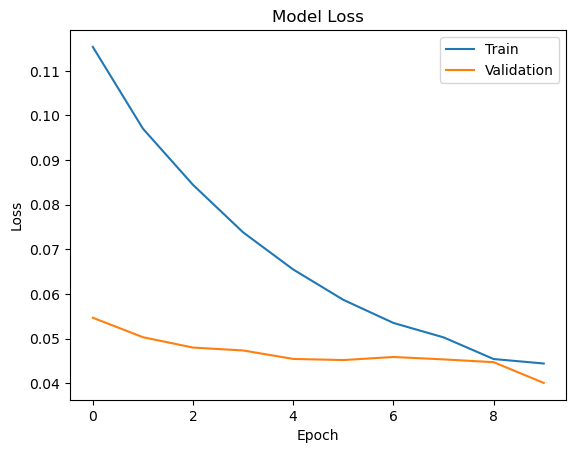

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [20]:
y_pred = model.predict(X_test.reshape(-1, 28, 28, 1))

313/313 [==============================] - 1s 3ms/step


In [21]:
y_pred_classes = np.argmax(y_pred, axis=1)

In [22]:
y_true = np.argmax(y_test, axis=1)

In [23]:
acc = (np.mean(np.argmax(y_pred, axis=1) == np.argmax(y_test, axis=1)))*100
print('Accuracy:', acc)

Accuracy: 98.89


In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_true,y_pred_classes))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.98      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.98      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.98      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [25]:
from collections import Counter
c=Counter(list(np.ravel(y_pred_classes)))
c.most_common

<bound method Counter.most_common of Counter({1: 1138, 7: 1031, 2: 1030, 3: 1022, 9: 993, 0: 988, 4: 985, 8: 970, 6: 952, 5: 891})>

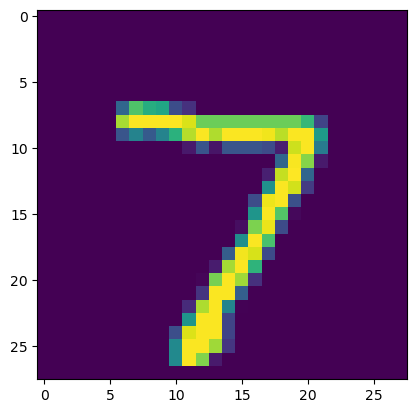

In [27]:
plt.imshow(X_test[np.where(y_pred_classes==7)][0])